Centroids: [[2. 2.]
 [9. 9.]]
    X   Y  Cluster
0   1   1        0
1   2   2        0
2   3   3        0
3   8   8        1
4   9   9        1
5  10  10        1


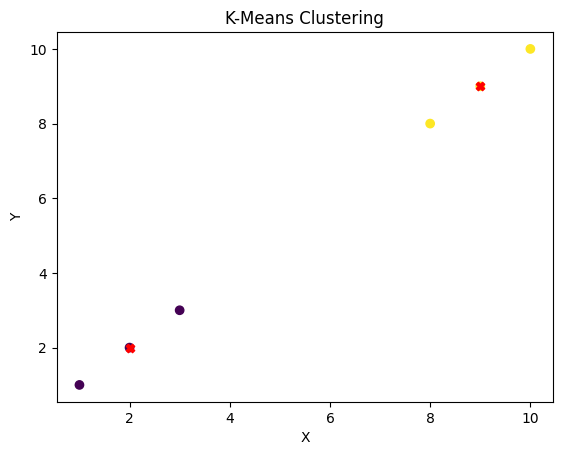

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# داده‌ها را آماده کنید
data = {'X': [1, 2, 3, 8, 9, 10],
        'Y': [1, 2, 3, 8, 9, 10]}
df = pd.DataFrame(data)
# ایجاد مدل K-میانگین با 2 خوشه
kmeans = KMeans(n_clusters=2, random_state=42)
# آموزش مدل
kmeans.fit(df)
# پیش‌بینی خوشه‌ها
df['Cluster'] = kmeans.predict(df)
# نمایش مراکز خوشه‌ها
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(f'Centroids: {centroids}')
print(df)
# ترسیم داده‌ها و خوشه‌ها
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


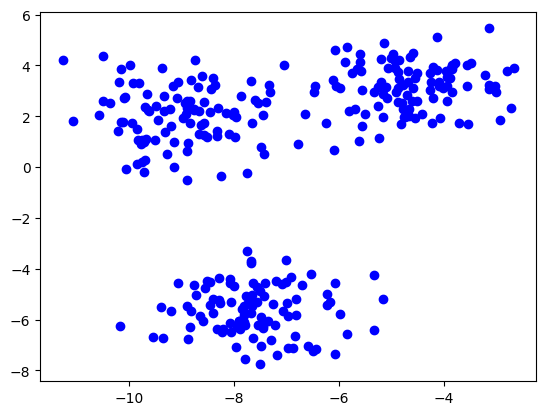

In [59]:
X, Y = make_blobs(n_samples=300, n_features=2, centers=3)
plt.scatter(X[:, 0], X[:, 1], color="b")
plt.show()

In [60]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

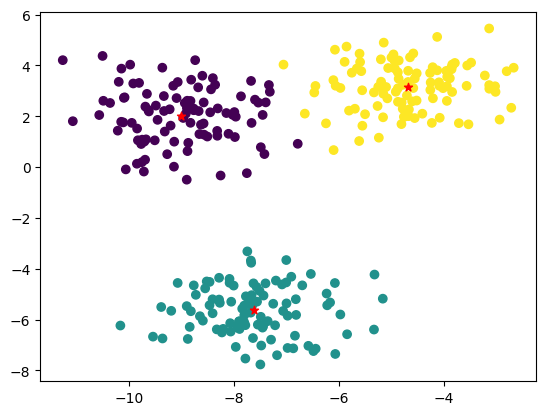

In [61]:
centers= model.cluster_centers_
labels = model.labels_

plt.scatter(X[:,0], X[:,1],c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="*")
plt.show()

# الگوریتم DBSCAN در پایتون

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


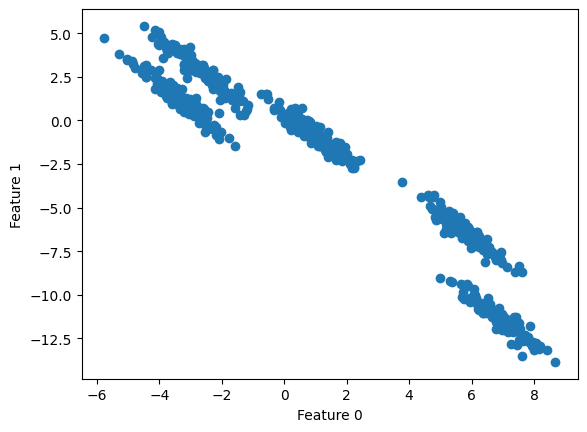

In [63]:

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

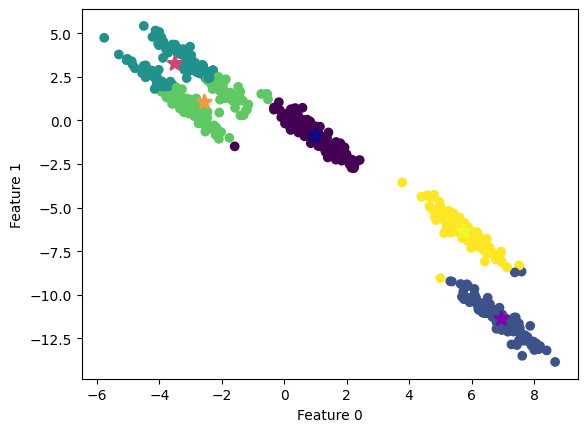

In [64]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)
centers=kmeans.cluster_centers_
# labels= kmeans.labels_
y_pred=kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis")
plt.scatter(centers[:, 0],   
            centers[:, 1],
            marker='*', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

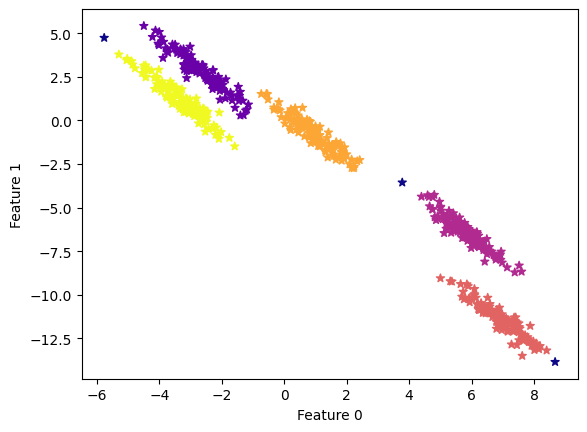

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.123, min_samples=2)
clusters=dbscan.fit_predict(X_scaled)
plt.scatter(X[:,0], X[:,1], marker="*",c=clusters,cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


In [66]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(y, y_pred).__round__(2))
# ARI = 0.76
#DBSCAN performance:
print("ARI =", adjusted_rand_score(y, clusters).__round__(2))
# ARI = 0.99

ARI = 0.75
ARI = 0.99


# Kmeans

In [67]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X=x)

KMeans(n_clusters=2, random_state=42)

In [68]:
center = kmeans.cluster_centers_
labels = kmeans.labels_
y_pred= kmeans.predict(X=x)
center, labels


(array([[7.33333333, 9.        ],
        [1.16666667, 1.46666667]]),
 array([1, 1, 0, 0, 1, 0], dtype=int32))

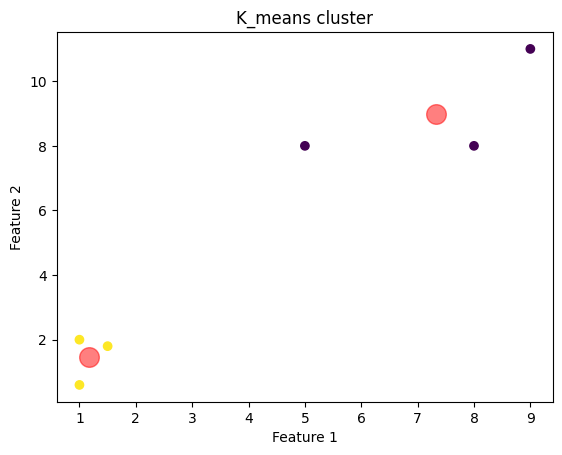

In [69]:

plt.scatter(x[:,0], x[:,1], c=y_pred, cmap='viridis')
plt.scatter(center[:,0], center[:,1],c="red",s=200,alpha=0.5)
plt.title("K_means cluster")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()